In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from iaml_cw2_helpers import *
from iaml212cw2_my_helpers import *
from sklearn.decomposition import PCA
%matplotlib inline
X, Y = load_Q1_dataset()
print('X: ', X.shape, 'Y: ', Y.shape)
Xtrn = X[100:, :]; Ytrn = Y[100:] #traning dataset
Xtst = X[0: 100, :]; Ytst = Y[0: 100] #test dataset

X:  (800, 9) Y:  (800,)


In [2]:
print_versions()


Python	3.9.7 <=> 3.9.2
Scipy	1.7.0 : Ok
Numpy	1.21.1 : Ok
Sklearn	0.24.2 : Ok
Pandas	1.3.1 : Ok
Matplotlib	3.4.2 : Ok
Seaborn	0.11.1 : Ok


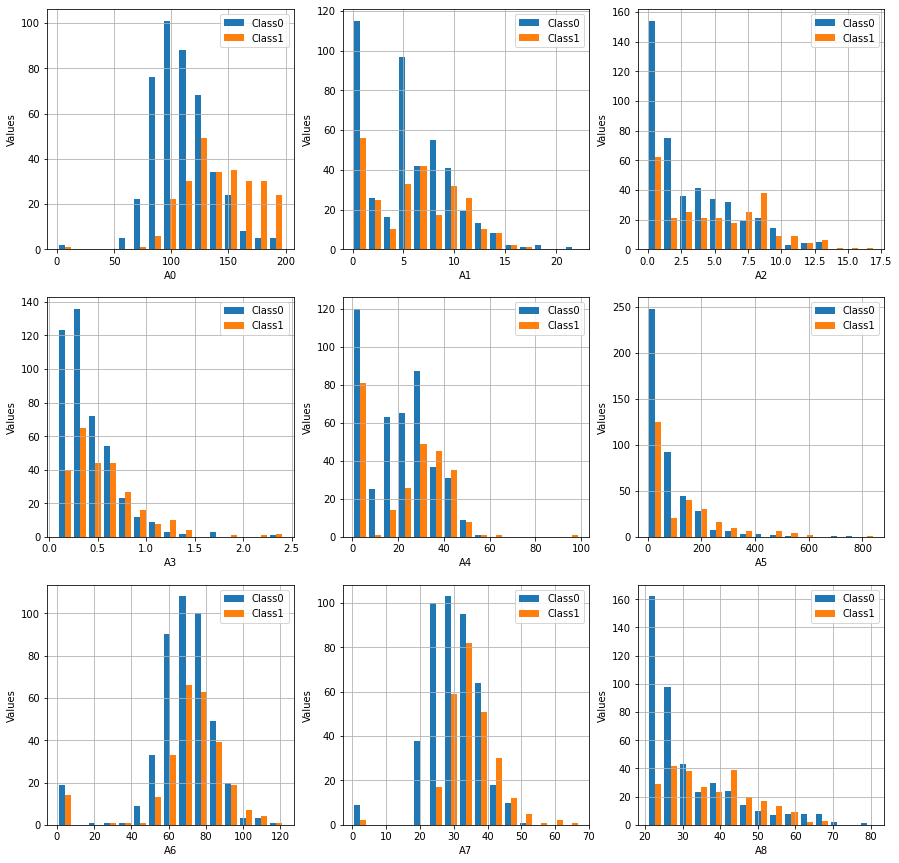

In [3]:
#Q1.1
fig, ax = plt.subplots(3,3, figsize = (15,15))
for i in range(len(Xtrn[0])):
    Xa = []
    Xb = []
    for j in range(len(Xtrn)):
        if Ytrn[j] == 0:
            Xa.append(Xtrn[j][i])
        elif Ytrn[j] == 1:
            Xb.append(Xtrn[j][i])
        else:
            print("Unexpected class {0}".format(Ytrn[j]))
    ax_now = ax[int(i/3)][i%3]
    ax_now.hist([Xa, Xb], bins=15)
    ax_now.grid()
    ax_now.set_xlabel("A{0}".format(i))
    ax_now.set_ylabel("Values")
    ax_now.legend(["Class0", "Class1"],loc="upper right")
fig.savefig('q1.1.jpg')

In [4]:
#Q1.2
def calculate_r(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_diff = np.array([x-x_mean for x in x])
    x_diff_sqr = np.array([(x-x_mean)**2 for x in x])
    y_diff = np.array([y-y_mean for y in y])
    y_diff_sqr = np.array([(y-y_mean)**2 for y in y])
    return np.sum(x_diff*y_diff) / np.sqrt(np.sum(x_diff_sqr)*np.sum(y_diff_sqr))

r = []
for i in range(len(Xtrn[0])):
    x_ith_feature_array = [elem[i] for elem in Xtrn]
    r_value = calculate_r(x_ith_feature_array,Ytrn)
    # r_value = scipy.stats.pearsonr(x_ith_feature_array, Ytrn)[0]
    r.append(r_value)
    print("A{0} correlation coefficients is {1:.3f}".format(i,r_value))

A0 correlation coefficients is 0.491
A1 correlation coefficients is 0.087
A2 correlation coefficients is 0.227
A3 correlation coefficients is 0.207
A4 correlation coefficients is 0.108
A5 correlation coefficients is 0.186
A6 correlation coefficients is 0.076
A7 correlation coefficients is 0.304
A8 correlation coefficients is 0.240


Sum of all the variances: 16621.857


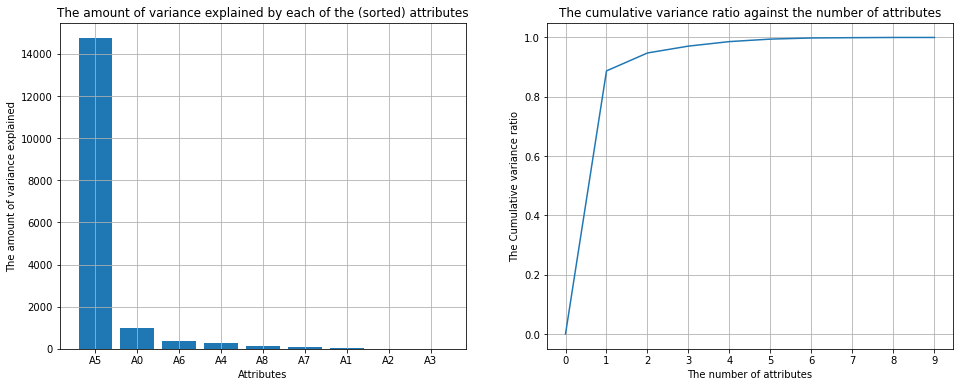

In [5]:
#Q1.4
variance_array = dict()
for i in range(len(Xtrn[0])):
    x_ith_feature_array = [elem[i] for elem in Xtrn]
    variance_array["A{0}".format(i)] = np.var(x_ith_feature_array)
variance_array = dict(reversed(sorted(variance_array.items(), key=lambda item: item[1])))
sum_of_variances = np.sum(list(variance_array.values()))
print('Sum of all the variances: {0:.3f}'.format(sum_of_variances))
fig, ax = plt.subplots(1,2, figsize = (16,6))

# sns.lineplot(x=variance_array.keys(),y=variance_array.values(), ax=ax[0])
ax[0].bar(variance_array.keys(),variance_array.values())
ax[0].grid()
ax[0].set_xlabel("Attributes")
ax[0].set_ylabel("The amount of variance explained")
ax[0].set_title('The amount of variance explained by each of the (sorted) attributes')
variance_cumulative_ratio_array = np.cumsum(list(variance_array.values())) / sum_of_variances
variance_cumulative_ratio_array = np.insert(variance_cumulative_ratio_array,0, 0)
ax[1].plot(range(len(variance_cumulative_ratio_array)),variance_cumulative_ratio_array)
ax[1].grid()
ax[1].set_xlabel("The number of attributes")
ax[1].set_ylabel("The Cumulative variance ratio")
ax[1].set_title('The cumulative variance ratio against the number of attributes')
ax[1].set_xticks(np.arange(len(variance_cumulative_ratio_array)))
fig.savefig('q1.4.jpg')

Total amount of unbiased sample variance explained:16645.637
[1.49702110e+04 8.99436290e+02 3.95950144e+02 1.95445496e+02
 1.13933299e+02 4.62311360e+01 1.65302042e+01 7.80013781e+00
 9.88659957e-02]
9


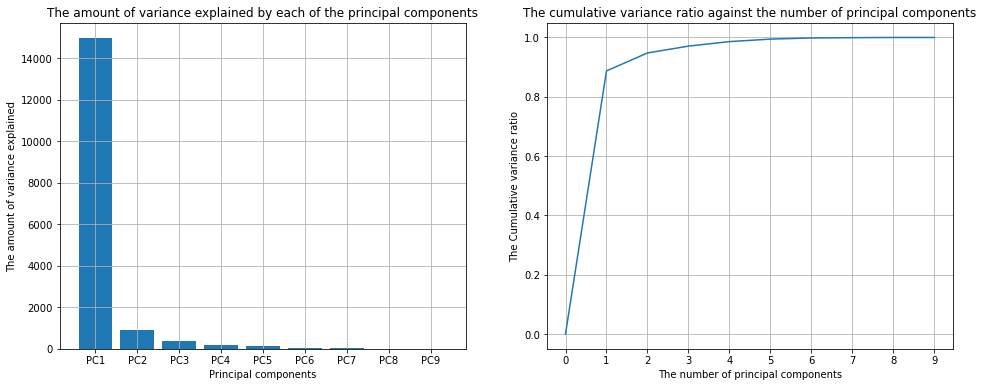

In [31]:
#Q1.5
pca = PCA().fit(Xtrn)
explained_amount = pca.explained_variance_
explained_ratio = pca.explained_variance_ratio_
print('Total amount of unbiased sample variance explained:{0:.3f}'.format(np.sum(explained_amount)))
fig, ax = plt.subplots(1,2, figsize = (16,6))
#TODO check graph type
explained_amount_labels = []
for i in range(len(explained_amount)):
    explained_amount_labels.append('PC{0}'.format(i+1))
ax[0].bar(explained_amount_labels,explained_amount)
ax[0].grid()
ax[0].set_xlabel("Principal components")
ax[0].set_ylabel("The amount of variance explained")
ax[0].set_title('The amount of variance explained by each of the principal components')

cumulative_explained_ratio = np.cumsum(explained_ratio) / np.sum(explained_ratio)
cumulative_explained_ratio = np.insert(cumulative_explained_ratio,0, 0)
ax[1].plot(range(len(variance_cumulative_ratio_array)), variance_cumulative_ratio_array)
ax[1].set_xlabel("The number of principal components")
ax[1].set_ylabel("The Cumulative variance ratio")
ax[1].set_title('The cumulative variance ratio against the number of principal components')
ax[1].set_xticks(np.arange(len(variance_cumulative_ratio_array)))
ax[1].grid()
fig.savefig('q1.5b.jpg')

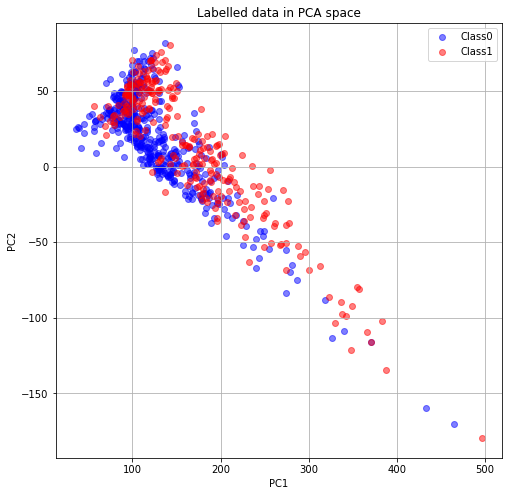

In [65]:
pca_2d_class0 = []
pca_2d_class1 = []
pca_2d = []
for i in range(len(Xtrn)):
    pca_2d.append([np.dot(pca.components_[0],Xtrn[i]),np.dot(pca.components_[1],Xtrn[i])])
    if Ytrn[i] == 0:
        pca_2d_class0.append([np.dot(pca.components_[0],Xtrn[i]),np.dot(pca.components_[1],Xtrn[i])])
    elif Ytrn[i] == 1:
        pca_2d_class1.append([np.dot(pca.components_[0],Xtrn[i]),np.dot(pca.components_[1],Xtrn[i])])
    else:
        print("Unexpected class {0}".format(Ytrn[i]))
plt.figure(figsize=(8,8))
plt.scatter(x=[point[0] for point in pca_2d_class0], y=[point[1] for point in pca_2d_class0], c='blue', alpha=0.5)
plt.scatter(x=[point[0] for point in pca_2d_class1], y=[point[1] for point in pca_2d_class1], c='red', alpha=0.5)
plt.title('Labelled data in PCA space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(["Class0", "Class1"],loc="upper right")
plt.grid()
plt.savefig('q1.5c.jpg')
plt.show()

In [17]:
pc1 = [point[0] for point in pca_2d]
pc2 = [point[1] for point in pca_2d]
pc1_r = []
pc2_r = []
labels = []
for i in range(len(Xtrn[0])):
    x_ith_feature_array = [elem[i] for elem in Xtrn]
    pc1_r.append('{:.3f}'.format(scipy.stats.pearsonr(x_ith_feature_array, pc1)[0]))
    pc2_r.append('{:.3f}'.format(scipy.stats.pearsonr(x_ith_feature_array, pc2)[0]))
    labels.append('A{0}'.format(i))
pca_correlation_coefficient = pd.DataFrame(data=[pc1_r,pc2_r], columns=labels, index=['PC1', 'PC2'])
pca_correlation_coefficient

,A0,A1,A2,A3,A4,A5,A6,A7,A8
PC1,0.386,-0.046,-0.057,0.186,0.459,1.000,0.101,0.232,-0.002
PC2,-0.914,-0.091,-0.225,-0.080,0.097,0.024,-0.255,-0.173,-0.373


In [39]:
#1.6
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(Xtrn)
Xtrn_s = scaler.transform(Xtrn)
Xtst_s = scaler.transform(Xtst)

pca_std = PCA().fit(Xtrn_s)
explained_amount = pca_std.explained_variance_
explained_ratio = pca_std.explained_variance_ratio_
print('Total amount of unbiased sample variance explained:{0:.3f}'.format(np.sum(explained_amount)))

Total amount of unbiased sample variance explained:9.013


[[ 0.40716383  0.03883791  0.18163072  0.24785878  0.42232513  0.42694714
   0.35441326  0.44138793  0.23918841]
 [ 0.1358815   0.07661042  0.58201139 -0.15901784 -0.35686566 -0.28319777
   0.17171878 -0.12900232  0.59829768]]


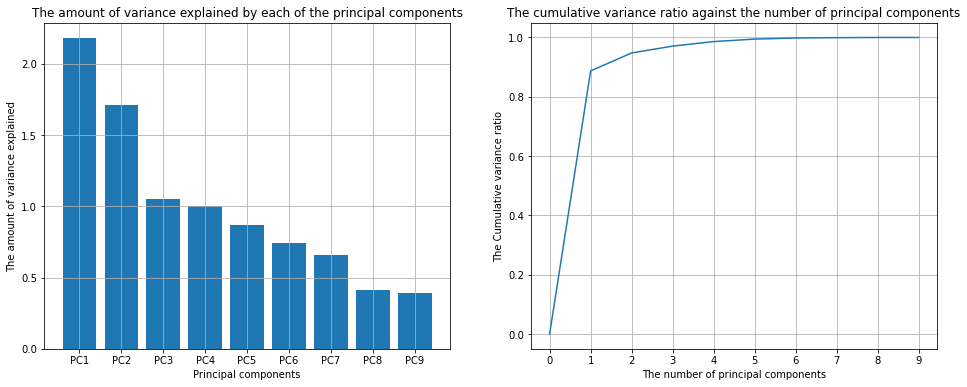

In [43]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
explained_amount_labels = []
for i in range(len(explained_amount)):
    explained_amount_labels.append('PC{0}'.format(i+1))
ax[0].bar(explained_amount_labels,explained_amount)
ax[0].grid()
ax[0].set_xlabel("Principal components")
ax[0].set_ylabel("The amount of variance explained")
ax[0].set_title('The amount of variance explained by each of the principal components')

cumulative_explained_ratio = np.cumsum(explained_ratio) / np.sum(explained_ratio)
cumulative_explained_ratio = np.insert(cumulative_explained_ratio,0, 0)
ax[1].plot(range(len(variance_cumulative_ratio_array)), variance_cumulative_ratio_array)
ax[1].set_xlabel("The number of principal components")
ax[1].set_ylabel("The Cumulative variance ratio")
ax[1].set_title('The cumulative variance ratio against the number of principal components')
ax[1].set_xticks(np.arange(len(variance_cumulative_ratio_array)))
ax[1].grid()
fig.savefig('q1.6b.jpg')

print(pca_std.components_[0:2,:])
print(np.dot(pca_std.components_[0:2,:], Xtrn_s).transpose())

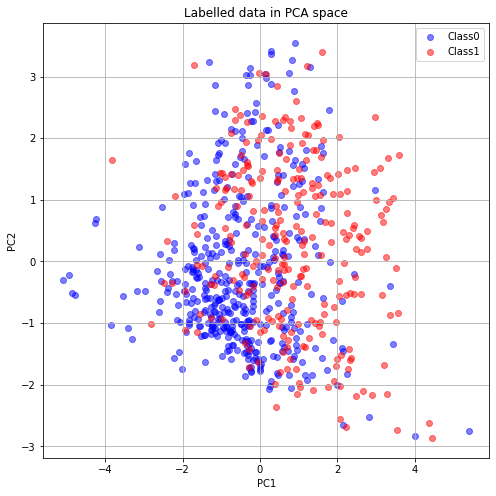

In [63]:
pca_2d_class0 = []
pca_2d_class1 = []
pca_2d = []
for i in range(len(Xtrn_s)):
    pca_2d.append([np.dot(pca_std.components_[0],Xtrn_s[i]),np.dot(pca_std.components_[1],Xtrn_s[i])])
    if Ytrn[i] == 0:
        pca_2d_class0.append([np.dot(pca_std.components_[0],Xtrn_s[i]),np.dot(pca_std.components_[1],Xtrn_s[i])])
    elif Ytrn[i] == 1:
        pca_2d_class1.append([np.dot(pca_std.components_[0],Xtrn_s[i]),np.dot(pca_std.components_[1],Xtrn_s[i])])
    else:
        print("Unexpected class {0}".format(Ytrn[i]))
plt.figure(figsize=(8,8))
plt.scatter(x=[point[0] for point in pca_2d_class0], y=[point[1] for point in pca_2d_class0], c='blue', alpha=0.5)
plt.scatter(x=[point[0] for point in pca_2d_class1], y=[point[1] for point in pca_2d_class1], c='red', alpha=0.5)
plt.title('Labelled data in PCA space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(["Class0", "Class1"],loc="upper right")
plt.grid()
plt.savefig('q1.6c.jpg')
plt.show()

In [49]:
pc1 = [point[0] for point in pca_2d]
pc2 = [point[1] for point in pca_2d]
pc1_r = []
pc2_r = []
labels = []
for i in range(len(Xtrn[0])):
    x_ith_feature_array = [elem[i] for elem in Xtrn]
    pc1_r.append('{:.3f}'.format(scipy.stats.pearsonr(x_ith_feature_array, pc1)[0]))
    pc2_r.append('{:.3f}'.format(scipy.stats.pearsonr(x_ith_feature_array, pc2)[0]))
    labels.append('A{0}'.format(i))
pca_correlation_coefficient = pd.DataFrame(data=[pc1_r,pc2_r], columns=labels, index=['PC1', 'PC2'])
pca_correlation_coefficient

,A0,A1,A2,A3,A4,A5,A6,A7,A8
PC1,0.601,0.057,0.268,0.366,0.623,0.630,0.523,0.651,0.353
PC2,0.177,0.100,0.760,-0.208,-0.466,-0.370,0.224,-0.168,0.781


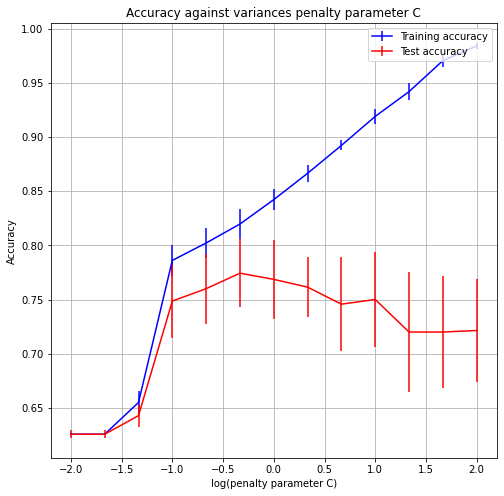

In [77]:
#1.8
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
C_value_list = np.logspace(-2,2,num=13)
svc_train_result_dict = dict()
svc_test_result_dict = dict()
for C in C_value_list:
    skf = StratifiedKFold()
    train_score_list = []
    test_score_list = []
    for train_index, test_index in skf.split(Xtrn_s, Ytrn):
        X_train, y_train = Xtrn_s[train_index], Ytrn[train_index]
        X_test, y_test = Xtrn_s[test_index], Ytrn[test_index]
        clf = SVC(C=C).fit(X_train, y_train)
        train_score_list.append(clf.score(X_train, y_train))
        test_score_list.append(clf.score(X_test, y_test))
    svc_train_result_dict[C] = train_score_list
    svc_test_result_dict[C] = test_score_list
svc_train_result_mean = [np.mean(value) for key,value in svc_train_result_dict.items()]
svc_train_result_std = [np.std(value) for key,value in svc_train_result_dict.items()]
svc_test_result_mean = [np.mean(value) for key,value in svc_test_result_dict.items()]
svc_test_result_std = [np.std(value) for key,value in svc_test_result_dict.items()]
C_value_list_log = [np.log10(C) for C in C_value_list]
plt.figure(figsize=(8,8))
plt.errorbar(x=C_value_list_log,y=svc_train_result_mean,yerr=svc_train_result_std,color='blue')
plt.errorbar(x=C_value_list_log,y=svc_test_result_mean,yerr=svc_test_result_std,color='red')
plt.title('Accuracy against variances penalty parameter C')
plt.xlabel('log(penalty parameter C)')
plt.ylabel('Accuracy')
plt.legend(["Training accuracy", "Test accuracy"],loc="upper right")
plt.grid()
plt.savefig('q1.8.jpg')

In [84]:
print('Best C is {0}'.format(C_value_list[5]))
clf = SVC(C=C_value_list[5]).fit(Xtrn_s, Ytrn)
print('The number of instances correctly classified:{0} and classification accuracy: {1:.2f}'
        .format(len(Xtst_s)*clf.score(Xtst_s, Ytst), clf.score(Xtst_s, Ytst),))

Best C is 0.46415888336127775
The number of instances correctly classified:75.0 and classification accuracy: 0.75


(318, 2)
The mean vector is [27.0209434  31.09320755]
Covariance matrix is [[95.14113475 41.46999034]
 [41.46999034 46.69341618]]
[[9.70444387e-08 9.49102603e-08 9.08389296e-08 ... 2.45088412e-18
  8.68226140e-19 3.00994991e-19]
 [2.02502343e-07 2.01886145e-07 1.96969648e-07 ... 1.26031146e-17
  4.55115803e-18 1.60835635e-18]
 [4.04361280e-07 4.10941477e-07 4.08701963e-07 ... 6.20173357e-17
  2.28292207e-17 8.22404352e-18]
 ...
 [2.15259991e-13 5.18801877e-13 1.22364683e-12 ... 1.39641249e-05
  1.21904437e-05 1.04145769e-05]
 [5.67267594e-14 1.39367062e-13 3.35080109e-13 ... 9.06847143e-06
  8.07000545e-06 7.02796999e-06]
 [1.43051607e-14 3.58260448e-14 8.78054187e-14 ... 5.63552738e-06
  5.11220493e-06 4.53835303e-06]]


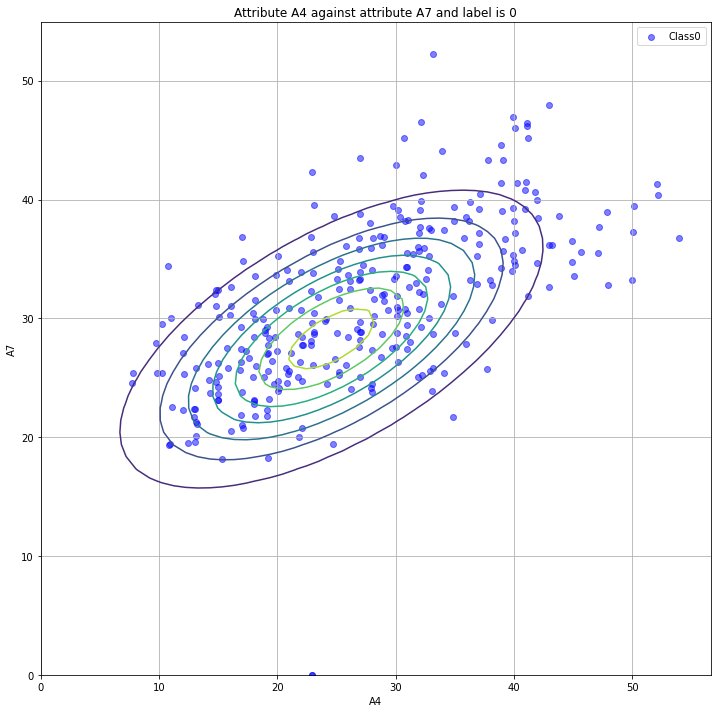

In [102]:
#1.9
# print(len(Xtrn[0]))
Ztrn = []
for i in range(len(Xtrn)):
    if Ytrn[i] == 0 and Xtrn[i][4] > 1:
        Ztrn.append(np.array([Xtrn[i][4],Xtrn[i][7]]))
Ztrn = np.array(Ztrn)
print(Ztrn.shape)
# Ztrn
print('The mean vector is {0}'.format(np.mean(Ztrn, axis=0)))
print('Covariance matrix is {0}'.format(np.cov(Ztrn, rowvar=False)))
mean_vector = np.mean(Ztrn, axis=0)
variance_cov_matrix = np.cov(Ztrn, rowvar=False)

variance_cov_matrix_inv = np.linalg.inv(variance_cov_matrix)
variance_cov_matrix_det = np.linalg.det(variance_cov_matrix)

Ztrn_x = [point[0] for point in Ztrn]
Ztrn_y = [point[1] for point in Ztrn]

Ztrn_X,Ztrn_Y = np.meshgrid(np.linspace(0, 55),np.linspace(0, 55))
coe = 1.0 / ((2 * np.pi)**2 * variance_cov_matrix_det)**0.5
Z = coe * np.e ** (-0.5 * (variance_cov_matrix_inv[0,0]*(Ztrn_X-mean_vector[0])**2 +
                           (variance_cov_matrix_inv[0,1] + variance_cov_matrix_inv[1,0])
                           *(Ztrn_X-mean_vector[0])*(Ztrn_Y-mean_vector[1]) + variance_cov_matrix_inv[1,1]*(Ztrn_Y-mean_vector[1])**2))

print(Z)

plt.figure(figsize=(12,12))
plt.contour(np.linspace(0, 50),np.linspace(0, 50),Z)
plt.scatter(x=Ztrn_x, y=Ztrn_y, c='blue', alpha=0.5)
plt.axis('equal')
plt.title('Attribute A4 against attribute A7 and label is 0')
plt.xlabel('A4')
plt.ylabel('A7')
plt.legend(["Class0"],loc="upper right")
plt.grid()
plt.savefig('q1.9.jpg')
plt.show()

The mean vector is [27.0209434  31.09320755]
Covariance matrix is [[94.84194889038014, 0], [0, 46.546581630382484]]


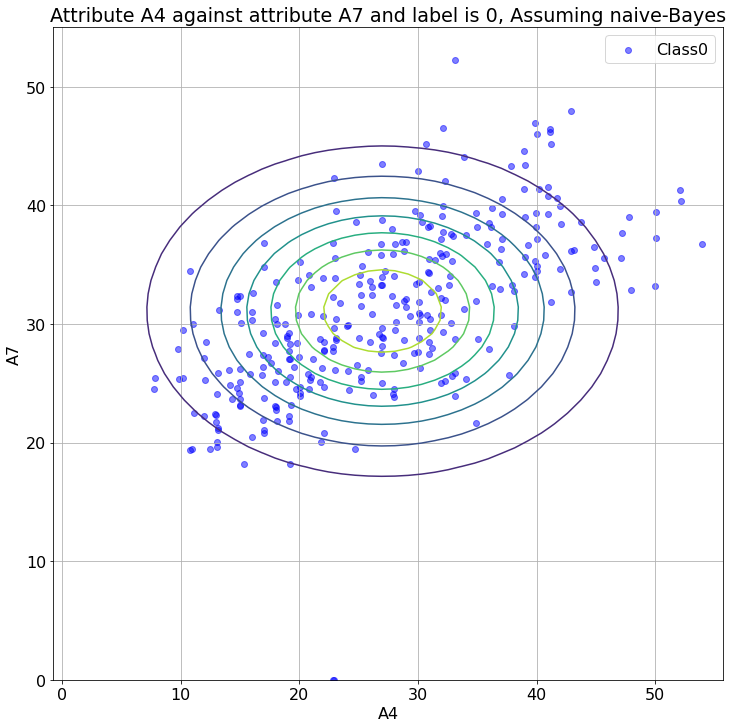

In [120]:
from sklearn.naive_bayes import GaussianNB

#1.10
some_points = list(zip(np.linspace(0, 50),np.linspace(0, 50)))
# gnb = GaussianNB(priors=[1.0, 0])
gnb = GaussianNB()
gnb.fit(Ztrn, np.zeros(len(Ztrn)))
# some_points
# print(gnb.sigma_)
# print(gnb.theta_)
# print(gnb.class_prior_)


mean_vector = [gnb.theta_[0][0],gnb.theta_[0][1]]
variance_cov_matrix = [[gnb.sigma_[0][0],0],[0,gnb.sigma_[0][1]]]
print('The mean vector is {0}'.format(gnb.theta_.reshape(2,)))
print('Covariance matrix is {0}'.format(variance_cov_matrix))
# print(variance_cov_matrix)
variance_cov_matrix_inv = np.linalg.inv(variance_cov_matrix)
variance_cov_matrix_det = np.linalg.det(variance_cov_matrix)

Ztrn_x = [point[0] for point in Ztrn]
Ztrn_y = [point[1] for point in Ztrn]

Ztrn_X,Ztrn_Y = np.meshgrid(np.linspace(0, 55),np.linspace(0, 55))
coe = 1.0 / ((2 * np.pi)**2 * variance_cov_matrix_det)**0.5
Z = coe * np.e ** (-0.5 * (variance_cov_matrix_inv[0,0]*(Ztrn_X-mean_vector[0])**2 +
                           (variance_cov_matrix_inv[0,1] + variance_cov_matrix_inv[1,0])
                           *(Ztrn_X-mean_vector[0])*(Ztrn_Y-mean_vector[1]) + variance_cov_matrix_inv[1,1]*(Ztrn_Y-mean_vector[1])**2))


plt.figure(figsize=(12,12))
plt.contour(np.linspace(0, 55),np.linspace(0, 55),Z)
plt.scatter(x=Ztrn_x, y=Ztrn_y, c='blue', alpha=0.5)
plt.axis('equal')
plt.title('Attribute A4 against attribute A7 and label is 0, Assuming naive-Bayes')
plt.xlabel('A4')
plt.ylabel('A7')
plt.legend(["Class0"],loc="upper right")
plt.grid()
plt.rcParams.update({'font.size': 16})
plt.savefig('q1.10.jpg')
plt.show()